<a href="https://colab.research.google.com/github/Kunaldahiya2907/Kunal-Dahiya-25pgdm0034/blob/main/Dynamic%20pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 4548.600808550965
R^2 Score: 0.8752468282750774


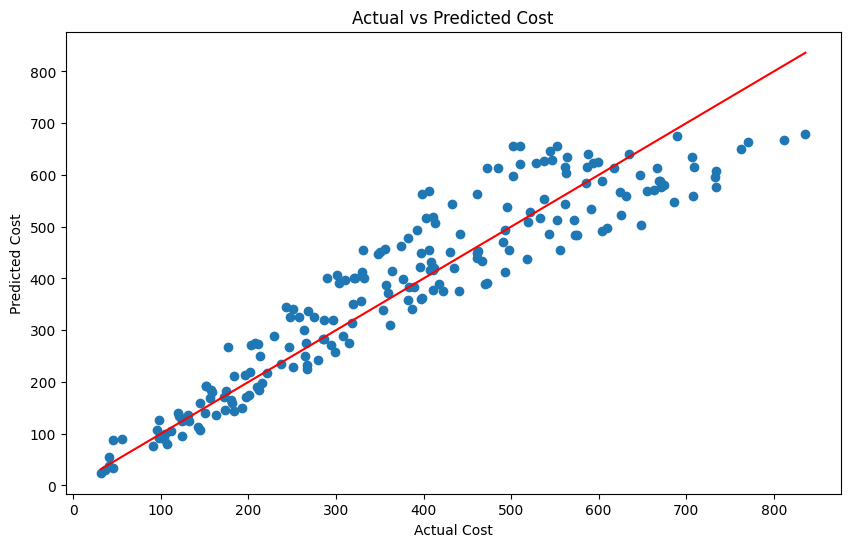

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


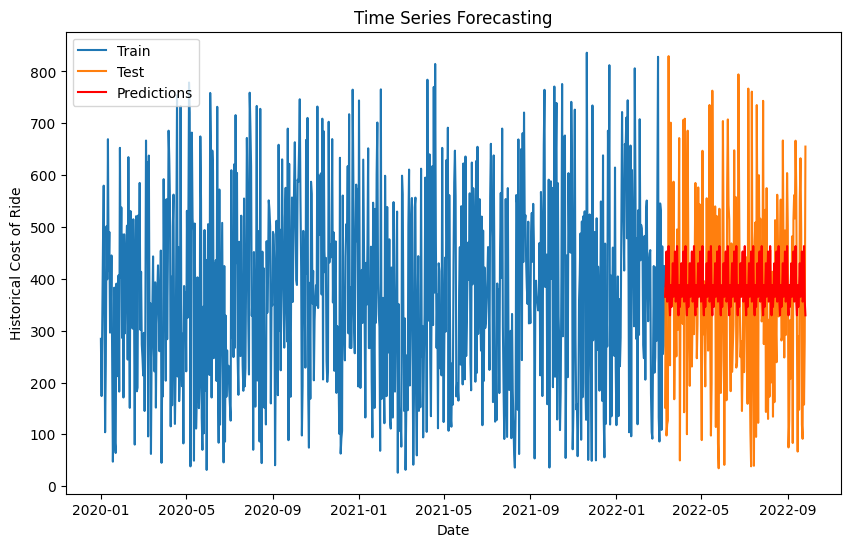

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = '/content/dynamic_pricing (1).csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Encode categorical variables
df = pd.get_dummies(df)

# Split the data into features and target variable
X = df.drop('Historical_Cost_of_Ride', axis=1)
y = df['Historical_Cost_of_Ride']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual vs Predicted Cost')
plt.show()

# Time Series Analysis
# Assuming 'Historical_Cost_of_Ride' is the time series data
df['Date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='D')  # Replace with actual date column if available
df.set_index('Date', inplace=True)

# Train-test split for time series
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit the model
model = ExponentialSmoothing(train['Historical_Cost_of_Ride'], seasonal='add', seasonal_periods=12).fit()

# Make predictions
predictions = model.forecast(len(test))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train['Historical_Cost_of_Ride'], label='Train')
plt.plot(test['Historical_Cost_of_Ride'], label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Historical Cost of Ride')
plt.title('Time Series Forecasting')
plt.legend()
plt.show()

Mean Squared Error: 4548.600808550965
R^2 Score: 0.8752468282750774


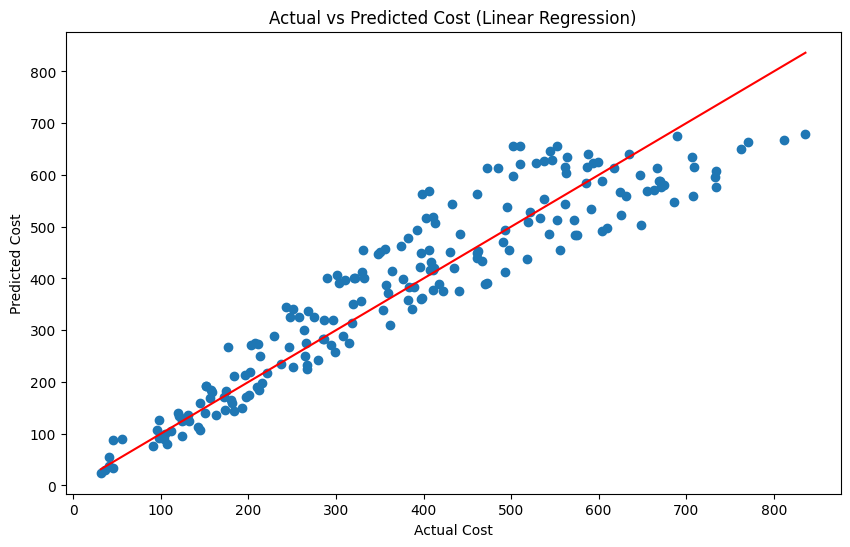

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Time Series Mean Squared Error: 35359.26032150007
Time Series R^2 Score: -0.01845541809921669


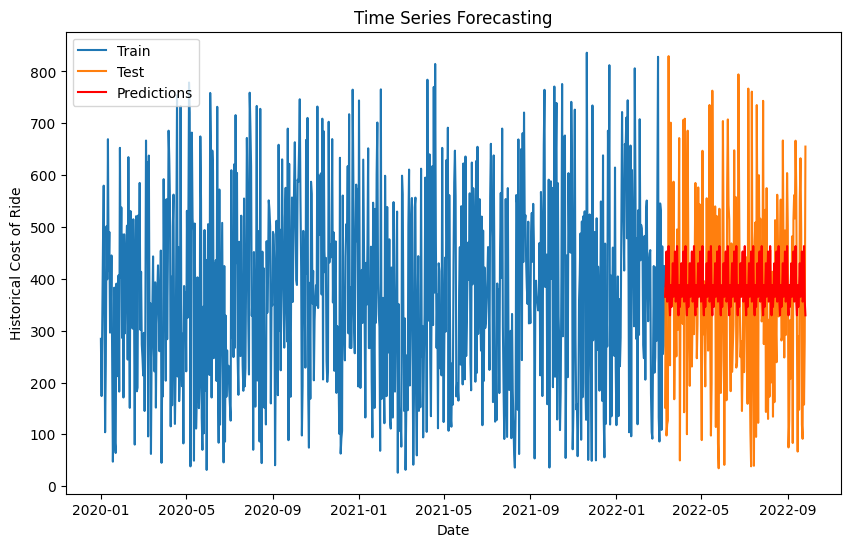

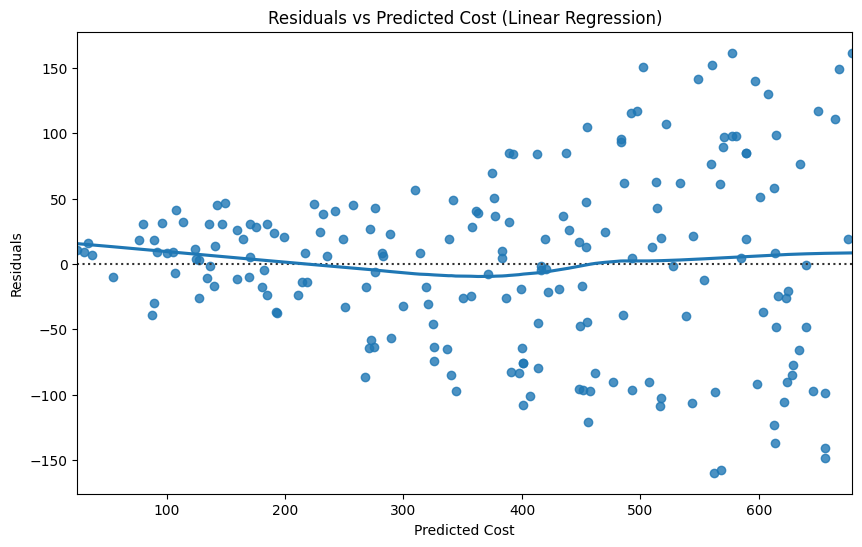

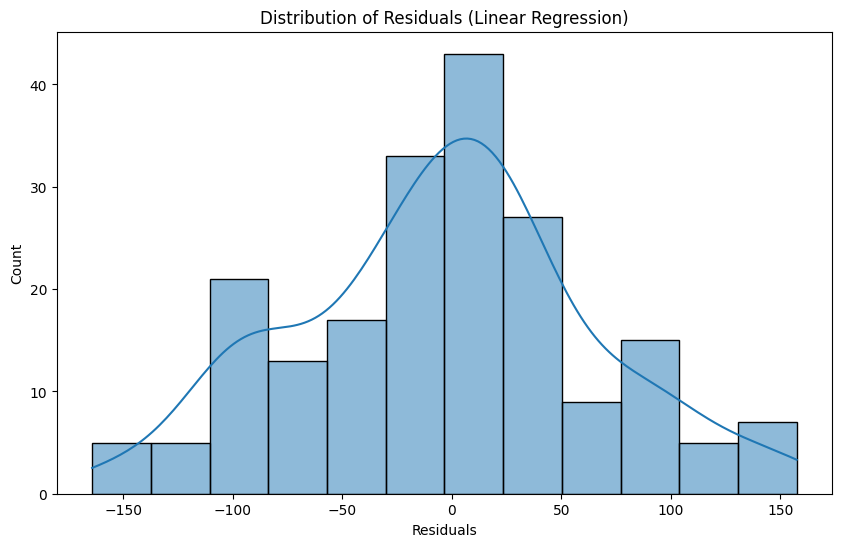

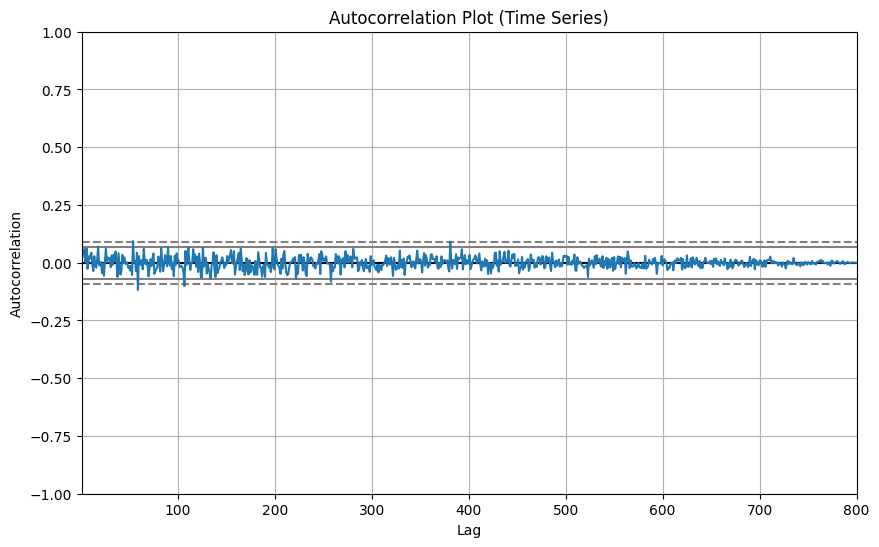

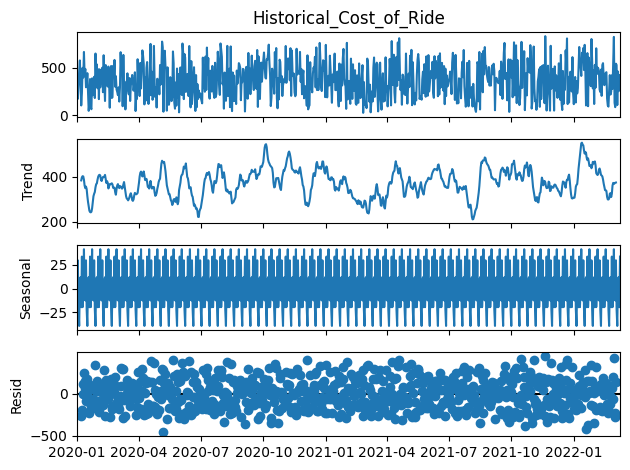

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = '/content/dynamic_pricing (1).csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Encode categorical variables
df = pd.get_dummies(df)

# Split the data into features and target variable
X = df.drop('Historical_Cost_of_Ride', axis=1)
y = df['Historical_Cost_of_Ride']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the results for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Actual vs Predicted Cost (Linear Regression)')
plt.show()

# Time Series Analysis
# Assuming 'Historical_Cost_of_Ride' is the time series data
df['Date'] = pd.date_range(start='1/1/2020', periods=len(df), freq='D')  # Replace with actual date column if available
df.set_index('Date', inplace=True)

# Train-test split for time series
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit the model
model = ExponentialSmoothing(train['Historical_Cost_of_Ride'], seasonal='add', seasonal_periods=12).fit()

# Make predictions
predictions = model.forecast(len(test))

# Evaluate the time series model
mse_ts = mean_squared_error(test['Historical_Cost_of_Ride'], predictions)
r2_ts = r2_score(test['Historical_Cost_of_Ride'], predictions)

print(f'Time Series Mean Squared Error: {mse_ts}')
print(f'Time Series R^2 Score: {r2_ts}')

# Plotting the results for Time Series Analysis
plt.figure(figsize=(10, 6))
plt.plot(train['Historical_Cost_of_Ride'], label='Train')
plt.plot(test['Historical_Cost_of_Ride'], label='Test')
plt.plot(predictions, label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Historical Cost of Ride')
plt.title('Time Series Forecasting')
plt.legend()
plt.show()

# Additional Visual Representations for Analysis

# Residual Plot for Linear Regression
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Predicted Cost')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Cost (Linear Regression)')
plt.show()

# Distribution Plot of Residuals for Linear Regression
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals (Linear Regression)')
plt.show()

# Autocorrelation Plot for Time Series Analysis
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
autocorrelation_plot(train['Historical_Cost_of_Ride'])
plt.title('Autocorrelation Plot (Time Series)')
plt.show()

# Seasonal Decomposition for Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(train['Historical_Cost_of_Ride'], model='additive', period=12)
result.plot()
plt.show()